# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Farah Karim

ID: 49-0733

Tutorial: 2

---

Name: Mohamed Osama

ID:49-5462

Tutorial:2

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [26]:
df.describe()
df.columns
df.tail()
display(df)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,—,gray,wheels exchange llc,15650,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,19350,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,22200,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,13400,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [31]:
#@title Default title text
 #wrong type
#df['mmr']=df['mmr'].astype(str)
df['mmr']=df['mmr'].str.replace('$',"")
#df['sellingprice']=df['sellingprice'].astype(str)
df['sellingprice']=df['sellingprice'].str.replace('$',"")
#df['odometer']=df['odometer'].astype(str)
df['odometer']=df['odometer'].str.replace('mi',"")
#df['color']=df['color'].astype(str)
df['color']=df['color'].str.replace('—',"unknown")
#df['interior']=df['interior'].astype(str)
df['interior']=df['interior'].str.replace('—',"unknown")
df['transmission']=df['transmission'].str.replace('automatic',"1")
df['transmission']=df['transmission'].str.replace('manual',"0")
df['model']=df['model'].str.capitalize()

df['mmr']=df['mmr'].astype(int)
df['sellingprice']=df['sellingprice'].astype(int)
df['odometer']=df['odometer'].astype(float)
df.info()

#inconsistencies 
df.drop(df[df['body'] == 'SuperCrew'].index,inplace = True)
df.drop(df[df['body'] == 'supercrew'].index,inplace = True)

df['body'] = df['body'].replace(['sedan','g sedan'],"Sedan")
df['body'] = df['body'].replace("Crew Cab", "Pickup Truck")
df['body'] = df['body'].replace("Regular Cab", "Pickup Truck")
df['body'] = df['body'].replace("Double Cab", "Pickup Truck")
df['body'] = df['body'].replace("Extended Cab", "Pickup Truck")
df['body'] = df['body'].replace("SuperCab", "Pickup Truck")
df['body'] = df['body'].replace("Quad Cab", "Pickup Truck")
df['body'] = df['body'].replace("quad cab", "Pickup Truck")
df['body'] = df['body'].replace("king cab", "Pickup Truck")
df['body'] = df['body'].replace("crew cab", "Pickup Truck")
df['body'] = df['body'].replace("CrewMax Cab", "Pickup Truck")
df['body'] = df['body'].replace("double cab", "Pickup Truck")
df['body'] = df['body'].replace("Club Cab", "Pickup Truck")
df['body'] = df['body'].replace("Access Cab", "Pickup Truck")
df['body'] = df['body'].replace("Cab Plus 4", "Pickup Truck")
df['body'] = df['body'].replace("crewmax cab", "Pickup Truck")
df['body'] = df['body'].replace("King Cab", "Pickup Truck")
df['body'] = df['body'].replace("extended cab", "Pickup Truck")
df['body'] = df['body'].replace("Club Cab", "Pickup Truck")
df['body'] = df['body'].replace("supercab", "Pickup Truck")
df['body'] = df['body'].replace("Cab Plus 4", "Pickup Truck")
df['body'] = df['body'].replace("access cab", "Pickup Truck")
df['body'] = df['body'].replace("Mega Cab", "Pickup Truck")
df['body'] = df['body'].replace("regular cab", "Pickup Truck")
df['body'] = df['body'].replace("mega cab", "Pickup Truck")
df['body'] = df['body'].replace("regular-cab", "Pickup Truck")
df['body'] = df['body'].replace("Xtracab", "Pickup Truck")
df['body'] = df['body'].replace("xtracab", "Pickup Truck")
df['body'] = df['body'].replace("suv", "SUV")
df['body'] = df['body'].replace("wagon", "Wagon")
df['body'] = df['body'].replace("E-Series Van", "MiniVan")
df['body'] = df['body'].replace("minivan", "MiniVan")
df['body'] = df['body'].replace("G Sedan", "Sedan")
df['body'] = df['body'].replace("g Sedan", "Sedan")

df['body'] = df['body'].replace("coupe", "Coupe")
df['body'] = df['body'].replace("convertible", "Convertible")
df['body'] = df['body'].replace("G Convertible", "Convertible")
df['body'] = df['body'].replace("Beetle Convertible", "Convertible")
df['body'] = df['body'].replace("hatchback", "Hatchback")
df['body'] = df['body'].replace("Xtracab", "Pickup Truck")
df['body'] = df['body'].replace(['xtracab','supercrew',], "Pickup Truck")
df['body'] = df['body'].replace("G Coupe", "Coupe")
df['body'] = df['body'].replace("Genesis Coupe", "Coupe")
df['body'] = df['body'].replace("G37 Convertible", "Convertible")
df['body'] = df['body'].replace("Beetle Convertible", "Convertible")
df['body'] = df['body'].replace("promaster cargo van", "Minivan")
df['body'] = df['body'].replace("Koup", "Coupe")
df['body'] = df['body'].replace("Elantra Coupe", "Coupe")
df['body'] = df['body'].replace("Q60 Convertible", "Convertible")
df['body'] = df['body'].replace("Promaster Cargo Van", "Minivan")
df['body'] = df['body'].replace("Koup", "Coupe")
df['body'] = df['body'].replace("Elantra Coupe", "Coupe")
df['body'] = df['body'].replace("Q60 Convertible", "Convertible")
df['body'] = df['body'].replace("Promaster Cargo Van", "Minivan")
df['body'] = df['body'].replace("CTS Coupe", "Coupe")
df['body'] = df['body'].replace(['CTS Wagon','tsx sport wagon','TSX Sport Wagon'], "Wagon")
df['body'] = df['body'].replace("Q60 Convertible", "Convertible")
df['body'] = df['body'].replace("Promaster Cargo Van", "Minivan")
df['body'] = df['body'].replace(['g coupe','genesis coupe','CTS-V Coupe','Q60 Coupe','cts coupe'], 'Coupe')
df['body'] = df['body'].replace(['van','Van','e-series van','Transit Van'], 'Minivan')
df['body'] = df['body'].replace(['GranTurismo Convertible','beetle convertible','g convertible','granturismo convertible'], 'Convertible')


df['body'].unique()

display(df)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  float64
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  int64  
 14  sellingprice  46578 non-null  int64  
 15  saledate      46578 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 5.7+ MB


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,1,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4runner,SR5,SUV,1,jtezu5jr2e5064567,fl,4.9,17846.0,gray,unknown,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,Is 250,Base,Sedan,1,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,1,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-series van,E-250,MiniVan,1,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,1,2fmdk4gc2dbc03247,va,3.5,52844.0,unknown,gray,wheels exchange llc,15650,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G sedan,G37 Journey,Sedan,1,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,19350,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 series,328i,Sedan,1,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,22200,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,1,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,13400,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<AxesSubplot: xlabel='color', ylabel='count'>

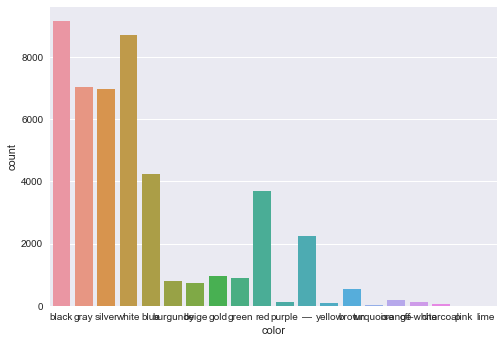

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

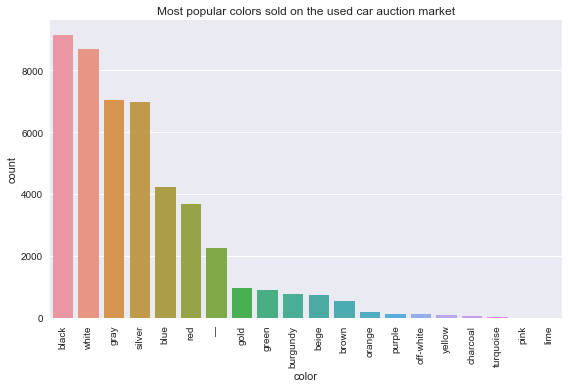

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

In [ ]:
df['make'].value_counts()

Ford             7871
Chevrolet        5322
Nissan           4297
Toyota           3474
Dodge            2718
Honda            2403
Hyundai          1801
BMW              1680
Kia              1639
Chrysler         1566
Infiniti         1442
Mercedes-Benz    1375
Jeep             1305
Volkswagen       1038
Lexus            1024
GMC               901
Mazda             701
Cadillac          606
Audi              485
Acura             476
Buick             467
Lincoln           457
Subaru            444
Ram               397
Pontiac           377
Mitsubishi        370
MINI              289
Saturn            286
Volvo             281
Scion             159
Mercury           148
Land Rover        143
Porsche           129
Jaguar            122
Suzuki             96
HUMMER             84
FIAT               56
Saab               41
smart              36
Oldsmobile         24
Isuzu              19
Maserati           10
Bentley             8
Fisker              3
Plymouth            3
Geo       

**Answer for Q1**: Ford, Chevrolet, Nissan

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

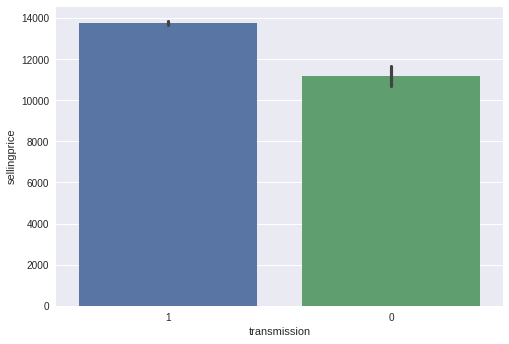

In [ ]:
sns.barplot(data=df,x="transmission",y="sellingprice")

**Answer for Q2**: 1 stands for automatic and 0 stands for manual. Automatic cars sell on average sell for a higher price than manual. 


**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

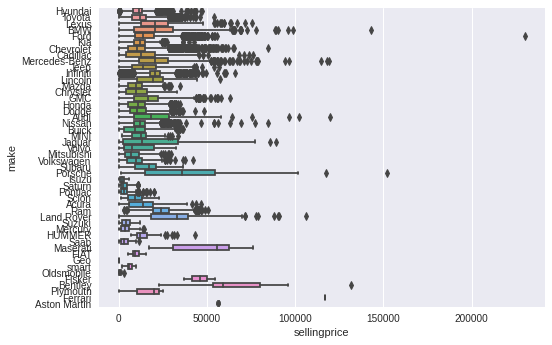

In [ ]:

sns.boxplot(data=df, x="sellingprice", y="make")


**Answer for Q3**: Porsche and Jaguar have the widest distribution. Porsche and Ford are the most 2 expensive. 

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

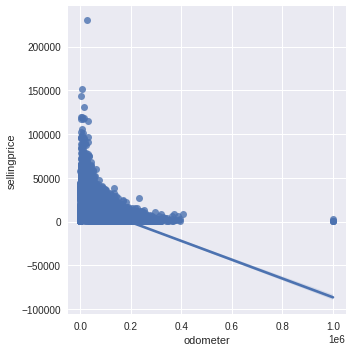

In [32]:
sns.lmplot(x='odometer', data=df,y='sellingprice')

**Answer for Q4**: Negative correlation

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

Text(0.5, 1.0, 'Scatter Plot of Car condition vs Selling price')

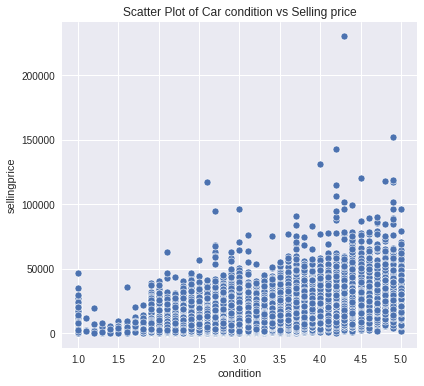

In [34]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='condition', y='sellingprice', data=df, palette='magma', ax=ax)
ax.set_title('Scatter Plot of Car condition vs Selling price')

**Answer for Q5**: Positive correalation

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

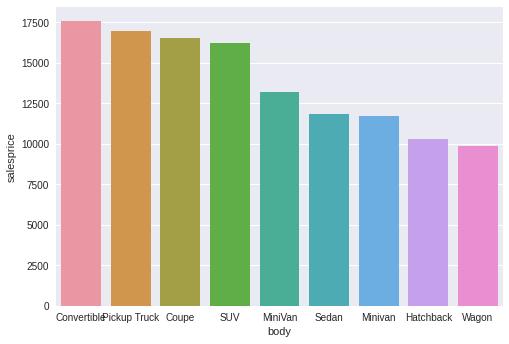

In [35]:
dff = df.groupby('body').sellingprice.mean().sort_values(ascending=False).to_frame(name="salesprice").reset_index()
sns.barplot(data=dff, x = "body", y = "salesprice")

**Answer for Q6**: Yes, the most expensive is convertible and the least expensive is wagon. 

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

## Modelling

_Apply the linear regression model below._

## Model Evaluation

_Evaluate the model you applied._

## Model Validation (Optional)

_Check if the model you applied meets the necessary assumptions for the chosen model._

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.